In [1]:
import cv2
from os import listdir
from os.path import isfile, join
import os, shutil
import numpy as np
import numpy as np
import cv2
from preprocessors import x_cord_contour, makeSquare, resize_to_pixel
from matplotlib import pyplot as plt

print(cv2.__version__)

4.1.2


In [3]:
subfolder = "./FINAL_PLATES/"
all_images = [f for f in os.listdir(subfolder) if f.endswith('.png')]
all_images

['TCY9024_2fc9fe1a98c1cfc87a61a57d4e517812.png',
 'PDH2942_23cb16cb3a74421b252af2313efa32e7.png',
 'TCB8933_d67814491008ea8ee8db7379e34692b9.png',
 'PCP4971_aed52381c1e8a7a43f77d4f4262b13ca.png',
 'PCH2060_2fb39e6716344e6a3194aadecd7c0d14.png',
 'PBZ2808_fda2b90aee4332e042d5a7b90ed4d827.png',
 'PCT1880_8bf55726693807d3f731346b7eeebed4.png',
 'PBM10_5ffcf3c0b025d2b83e6acb0d353b5da0.png',
 'PDP7283_2e7a91ed020a1e6496d50bb56051e509.png',
 'PCL397_ed5b709eca03038214e39d8d2caa5bd4.png',
 'PDP1256_9eeaa2c387fb38eebdf5f405714112a8.png',
 'PBP6949_8f27a249b66aea3350a3fe3db9c58c3f.png',
 'PCS6790_2bf6e6c89810d091e5bc893eff06c58a.png',
 'PCX6782_78cf15a8a218d5b08af1138579a13bf8.png',
 'TDN3978_d189525fdca324f230c4c08465a206ee.png',
 'PBX1764_fe25ed5c0d847d91139b5a06d6d6edf7.png',
 'PCF2460_ab99067d470512e87a6fdeacc7a02592.png',
 'PCP1049_d1f920f6485b2403d17a51055c064dfd.png',
 'TAC4471_f91d36ca97e86c29da4462589543edda.png',
 'PDS587_5b6189b325adfd076f95bd341b2ad75a.png',
 'PBB8541_da4643a39c6727

In [4]:
len(all_images)

4573

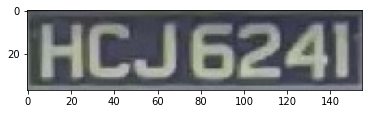

In [5]:
from matplotlib import pyplot as plt

image = cv2.imread('./FINAL_PLATES/HCJ6241_2f73c81e0300ded4d6db9f2b51b35939.jpg')

#Show the image with matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

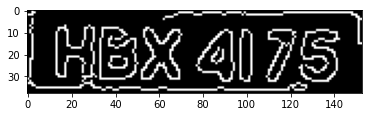

10
1.5 4 3 1.3333333333333333
4.0 9 6 1.5
9.5 18 24 0.75


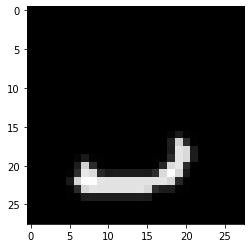

238.0 19 24 0.7916666666666666


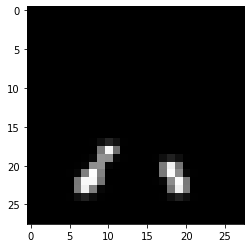

30.0 128 33 3.878787878787879
239.5 18 24 0.75


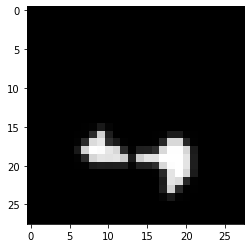

105.5 6 24 0.25


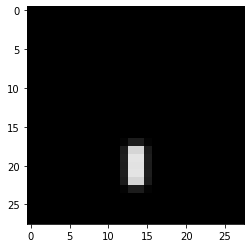

140.5 14 24 0.5833333333333334


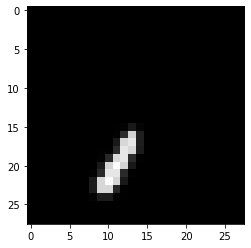

20.5 19 24 0.7916666666666666


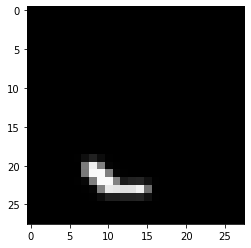

4.0 91 15 6.066666666666666
The number is: 


In [98]:
import numpy as np
import cv2
from preprocessors import x_cord_contour, makeSquare, resize_to_pixel
       
image = cv2.imread('./FINAL_PLATES/HBX4175_6aa21c9dd8ea446230cce7a830be72fa.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Blur image then find edges using Canny 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#cv2.imshow("blurred", blurred)
#cv2.waitKey(0)

kernel = np.ones((2,2), np.uint8)

#_, th2 = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#dilation = cv2.erode(th2, kernel, iterations = 5)

edged = cv2.Canny(blurred, 30, 150)

plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.show()
#_, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#dilation = cv2.erode(th2, kernel, iterations = 5)

#cv2.imshow("edged", edged)
#cv2.waitKey(0)

# Find Contours
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key = x_cord_contour, reverse = False)

print(len(contours))

# Create empty array to store entire number
full_number = []

# loop over the contours
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c)    
    ratio = (w*1.0) / (h*1.0)
    area = cv2.contourArea(c)
    print(area, w, h, ratio)

    if w >= 1 and h >= 15 and ratio < 1:
        roi = blurred[y:y + h, x:x + w]
        ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY)

        roi = makeSquare(roi)
        roi = resize_to_pixel(28, roi)
        #cv2.imshow("ROI", roi)
        #roi = roi / 255.0       
        #roi = roi.reshape(1,28,28,1) 
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        plt.show()
        ## Get Prediction
        #res = str(classifier.predict_classes(roi, 1, verbose = 0)[0])
        #full_number.append(res)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        #cv2.putText(image, res, (x , y + 155), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        #cv2.imshow("image", image)
        #cv2.waitKey(0) 
        
#cv2.destroyAllWindows()
print ("The number is: " + ''.join(full_number))

In [45]:
def dynamic_threshold(image, k):
    try:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        gray_image = image
        pass

    kernel = np.ones((k,k), np.uint8)

    _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    dilation = cv2.erode(th2, kernel, iterations = 1)

    return dilation

kernel = np.ones((2,2), np.uint8)

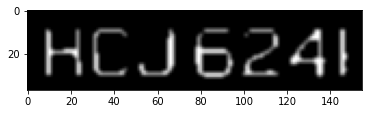

In [17]:
image = cv2.imread('./FINAL_PLATES/HCJ6241_2f73c81e0300ded4d6db9f2b51b35939.jpg')

eroded = dynamic_threshold(image,4)
blurred = cv2.GaussianBlur(eroded, (3, 3), 0)

#plt.imshow(cv2.cvtColor(th2, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
subfolder = "./Double_line_plates/"
#subfolder = "./flat/"
all_images = [f for f in os.listdir(subfolder) if f.endswith('.png')]
all_images

for im in all_images:
    image = cv2.imread(subfolder + "/" + im)
    width = image.shape[0]
    height = image.shape[1]
    aspectRatio = width / float(height)
    print(aspectRatio)
    


0.5612244897959183
0.5730337078651685
0.5633802816901409
0.5742574257425742
0.5844155844155844
0.5757575757575758
0.5729166666666666
0.5463917525773195
0.5955056179775281
0.6052631578947368
0.5963302752293578
0.5730337078651685
0.5416666666666666
0.5662650602409639
0.5420560747663551
0.5774647887323944


In [10]:
def imshow(image, title = ""):
    print(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    
def apply_brightness_contrast(input_img, brightness = 0, contrast = 50):
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    
    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)
    return buf

def isBackgroundBlack(image, threshold = 0.5):
    if(len(image.shape) > 2): 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  

    # Total if image was all white
    max_value_of_all_white = (th2.shape[0] * th2.shape[0]) * 255
    sum_of_LP = np.sum(th2)

    percent_of_white = max_value_of_all_white / sum_of_LP
    if percent_of_white < threshold:
        return False
    else:
        return True

def isPlateVertical(image):
    width = image.shape[0]
    height = image.shape[1]
    aspectRatio = width / float(height)
    vertical = aspectRatio > 0.35
    return vertical

## Better Method

Plate is vertical: False
Plate is on black background: True
Original Image


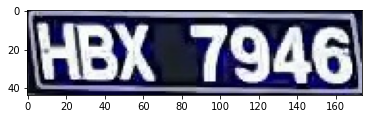

After Erosion


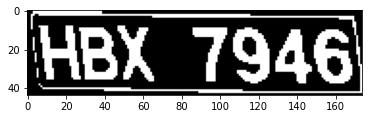

area = 0.0
area = 0.0
area = 0.0
area = 344.5
area = 254.0
area = 338.5
area = 161.0
area = 395.0
area = 186.5
area = 220.5
area = 174.0
Number of contours found = 11


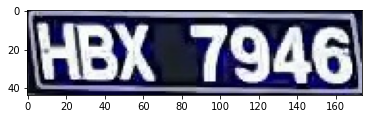

[220.5, 395.0, 186.5, 174.0, 161.0, 338.5, 254.0, 344.5]
Ratio = 0.7857142857142857
Ratio = 0.7407407407407407
Ratio = 0.6551724137931034
Ratio = 4.0
Ratio = 0.6428571428571429
Ratio = 0.6551724137931034
Ratio = 0.6785714285714286
Ratio = 0.7142857142857143


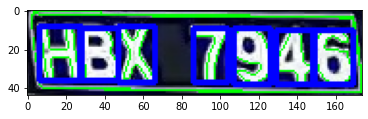

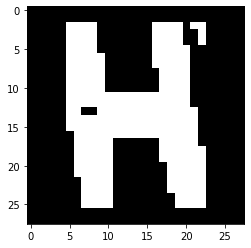

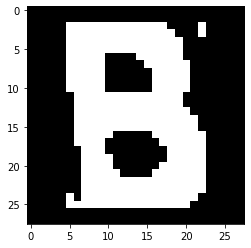

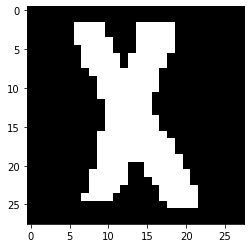

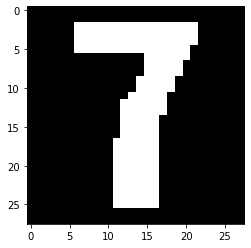

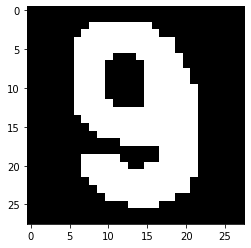

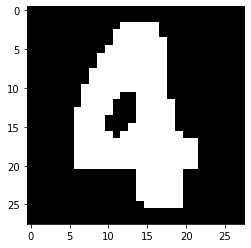

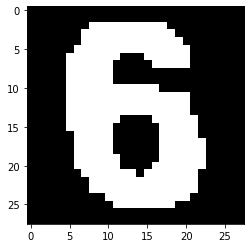

In [17]:
def getContoursforNumbers(image, original):
    contours, hierarchy = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours = sorted(contours, key = x_cord_contour, reverse = False)

    cv2.drawContours(original, contours, -1, (0,255,0), 3)
    print("Number of contours found = " + str(len(contours)))
    return contours, original

def x_cord_contour(contour):
    # This function take a contour from findContours
    # it then outputs the x centroid coordinates
    area = cv2.contourArea(contour)
    print("area = " + str(area))
    if area > 10:
        M = cv2.moments(contour)
        if M['m00'] == 0.0:
            return 0
        else:
            x_center = int(M['m10']/M['m00'])
            return x_center
    else:
        return 0
    
def dynamic_threshold(image, k):
    try:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        gray_image = image
        pass

    kernel = np.ones((k,k), np.uint8)

    _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    dilation = cv2.erode(th2, kernel, iterations = 1)

    return dilation

def pre_process(image, kernal_blur = 5, erosion = 2):
    # Blur is probably not necessary in most cases
    im1 = cv2.GaussianBlur(image, (kernal_blur, kernal_blur), 0)

    im1 = dynamic_threshold(image, erosion) # Recommend 2
    print("After Erosion")
    plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
    plt.show()
    contours, hierarchy = cv2.findContours(im1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours = sorted(contours, key = x_cord_contour, reverse = False)

    cv2.drawContours(org, contours, -1, (0,255,0), 1)
    print("Number of contours found = " + str(len(contours)))

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

    all_area = [cv2.contourArea(c) for c in contours if(cv2.contourArea(c) > 20)]
    return contours, all_area, image



image = cv2.imread('./FINAL_PLATES/HCZ5792_4b719878e237e342cb8656ca90c4b773.jpg')
#image = cv2.imread('./FINAL_PLATES/HBL3845_11fd5c969778278593b33708cf429617.png')
#image = cv2.imread('./FINAL_PLATES/HBX4175_6aa21c9dd8ea446230cce7a830be72fa.png')
image = cv2.imread('./FINAL_PLATES/HBX7946_101c3b4d7fbc03cb6410f45d4411a945.jpg')
#image = cv2.imread('./FINAL_PLATES/PBC6948_c48e574684f82d172dec62013753d2ef.png')



vertical = isPlateVertical(image)
blackgrnd = isBackgroundBlack(image)
print('Plate is vertical: {}'.format(vertical))
print('Plate is on black background: {}'.format(blackgrnd))

width = image.shape[0]
height = image.shape[1]
im_area = width * height

org = image.copy()
print("Original Image")
plt.imshow(cv2.cvtColor(org, cv2.COLOR_BGR2RGB))
plt.show()

#image = apply_brightness_contrast(image)
#imshow(image)

contours, all_area, image = pre_process(image)

if len(contours) < 3 and all_area[0] > (0.5 * im_area):
    print("Contour too big. Crop it")
    x,y,w,h = cv2.boundingRect(contours[0])
    im1 = image[y:h, x:w]
    plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.imshow(cv2.cvtColor(org, cv2.COLOR_BGR2RGB))
    plt.show()
    contours, all_area, image = pre_process(image)

    
print(all_area)

bounding_boxes = []
original_numbers = []
min_digit_area = 20
max_digit_area = 1000

for cnt in contours:
    area = cv2.contourArea(cnt)
    if (area > min_digit_area and area < max_digit_area):
        x,y,w,h = cv2.boundingRect(cnt)
        ratio = (w*1.0) / (h*1.0)
        print("Ratio = " + str(ratio))
        
        if ratio > 0.15 and ratio < 1:
            bounding_boxes.append([x,y,x+w,y+h])

#print(bounding_boxes)

for i in range(len(bounding_boxes)):
    x, y, x1, y1 = bounding_boxes[i]
    original = image[y:y1, x:x1]
    original_numbers.append(original)
    cv2.rectangle(org,(x,y),(x1,y1),(255,0,0),2)
    
plt.imshow(cv2.cvtColor(org, cv2.COLOR_BGR2RGB))
plt.show()  

for im in original_numbers:
    gray_image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    #ret, roi = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    _, roi = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    roi = makeSquare(roi)
    roi = resize_to_pixel(28, roi)
    _, roi = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.show()

### Test

Original


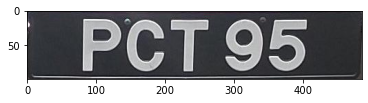

Plate is vertical: False
Plate is on black background: True
Original Image


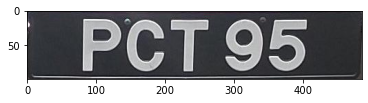

After Erosion


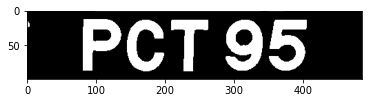

Number of contours found = 8


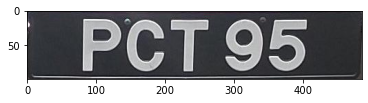

[2583.0, 1869.0, 239.0, 1478.0, 2848.5, 21.0, 2210.0]
Area = 18.5
Area = 2583.0
Ratio = 0.7567567567567568
Area = 1869.0
Ratio = 0.7297297297297297
Area = 239.0
Area = 1478.0
Ratio = 0.7297297297297297
Area = 2848.5
Ratio = 0.7397260273972602
Area = 21.0
Area = 2210.0
Ratio = 0.7534246575342466


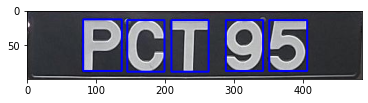

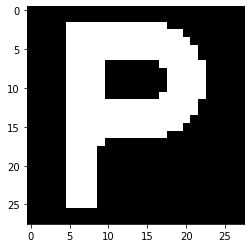

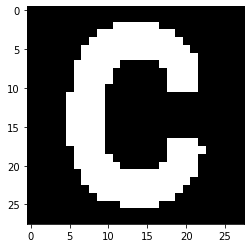

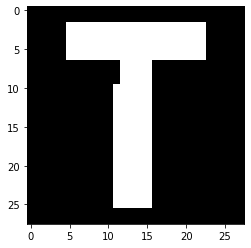

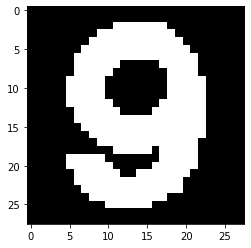

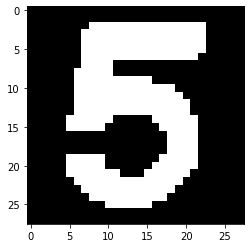

In [81]:
def getContoursforNumbers(image, original):
    contours, hierarchy = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours = sorted(contours, key = x_cord_contour, reverse = False)

    cv2.drawContours(original, contours, -1, (0,255,0), 3)
    print("Number of contours found = " + str(len(contours)))
    return contours, original

def x_cord_contour(contour):
    # This function take a contour from findContours
    # it then outputs the x centroid coordinates
    area = cv2.contourArea(contour)
    #print("area = " + str(area))
    if area > 10:
        M = cv2.moments(contour)
        if M['m00'] == 0.0:
            return 0
        else:
            x_center = int(M['m10']/M['m00'])
            return x_center
    else:
        return 0
    
def dynamic_threshold(image, k):
    try:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        gray_image = image
        pass

    kernel = np.ones((k,k), np.uint8)

    _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    dilation = cv2.erode(th2, kernel, iterations = 1)
    dilation = cv2.dilate(dilation, kernel, iterations = 1)

    return dilation

def pre_process(image, kernal_blur = 5, erosion = 3):
    org = image.copy()
    # Blur is probably not necessary in most cases
    #im1 = cv2.GaussianBlur(image, (kernal_blur, kernal_blur), 0)

    im1 = dynamic_threshold(image, erosion) # Recommend 2
    print("After Erosion")
    plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
    plt.show()
    contours, hierarchy = cv2.findContours(im1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours = sorted(contours, key = x_cord_contour, reverse = False)

    cv2.drawContours(org, contours, -1, (0,255,0), 1)
    print("Number of contours found = " + str(len(contours)))

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

    all_area = [cv2.contourArea(c) for c in contours if(cv2.contourArea(c) > 20)]
    return contours, all_area, org, im1

def splitPlate(image):
    contours, all_area, org, th = pre_process(image)
    margin = int((th.shape[0] / 2) * 0.25)

    centerAxis = int(th.shape[0] / 2)
    lowerMargin = centerAxis - margin
    upperMargin = centerAxis + margin

    line_sums = []

    for i in range(21,31):
        line_sums.append(np.sum(th[i]))

    bestCenterLineIdx = np.argmin(line_sums) - margin + centerAxis
    
    split_plate = []
    top = image[0:bestCenterLineIdx, 0:image.shape[1]]
    split_plate.append(top)
    bottom = image[bestCenterLineIdx:centerAxis+bestCenterLineIdx, 0:image.shape[1]]
    split_plate.append(bottom)
    return split_plate

def isBackgroundBlack(image, threshold = 0.4):
    if(len(image.shape) > 2): 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  

    # Total if image was all white
    max_value_of_all_white = (th2.shape[0] * th2.shape[0]) * 255
    sum_of_LP = np.sum(th2)

    percent_of_white = max_value_of_all_white / sum_of_LP
    #print(percent_of_white)
    if percent_of_white < threshold:
        return False
    else:
        return True

def isPlateVertical(image):
    width = image.shape[0]
    height = image.shape[1]
    aspectRatio = width / float(height)
    vertical = aspectRatio > 0.5
    #print(aspectRatio)
    return vertical

file_name = './FINAL_PLATES/HCZ5792_4b719878e237e342cb8656ca90c4b773.jpg'
file_name = './FINAL_PLATES/HBL3845_11fd5c969778278593b33708cf429617.png'
file_name = './FINAL_PLATES/HBX4175_6aa21c9dd8ea446230cce7a830be72fa.png'
file_name = './FINAL_PLATES/HBX7946_101c3b4d7fbc03cb6410f45d4411a945.jpg'
file_name = './FINAL_PLATES/PBC6948_c48e574684f82d172dec62013753d2ef.png'
file_name = './FINAL_PLATES/TCY9024_2fc9fe1a98c1cfc87a61a57d4e517812.png'
file_name = './FINAL_PLATES/HCX9433_6a1d921eab0f238d749e8b3b6bafc4b1.jpg'
file_name = './FINAL_PLATES/PCT95_33a64250d00cfead8d683e1cf94a8b42.jpg'


image = cv2.imread(file_name)
#image = cv2.imread('./FINAL_PLATES/HBL3845_11fd5c969778278593b33708cf429617.png')
#image = cv2.imread('./FINAL_PLATES/HBX4175_6aa21c9dd8ea446230cce7a830be72fa.png')
#image = cv2.imread('./FINAL_PLATES/HBX7946_101c3b4d7fbc03cb6410f45d4411a945.jpg')
#image = cv2.imread('./FINAL_PLATES/PBC6948_c48e574684f82d172dec62013753d2ef.png')

imshow(image,"Original")
vertical = isPlateVertical(image)
blackgrnd = isBackgroundBlack(image)
print('Plate is vertical: {}'.format(vertical))
print('Plate is on black background: {}'.format(blackgrnd))


if vertical:
    split = splitPlate(image)
else:
    split = []
    split.append(image)
    
for image in split:
    #image = apply_brightness_contrast(image, contrast = 50)
    width = image.shape[0]
    height = image.shape[1]
    im_area = width * height

    org = image.copy()
    print("Original Image")
    plt.imshow(cv2.cvtColor(org, cv2.COLOR_BGR2RGB))
    plt.show()

    contours, all_area, th, image = pre_process(image)

    if len(contours) < 3 and all_area[0] > (0.5 * im_area):
        print("Contour too big. Crop it")
        x,y,w,h = cv2.boundingRect(contours[0])
        im1 = image[y:h, x:w]
        plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
        plt.show()
        plt.imshow(cv2.cvtColor(org, cv2.COLOR_BGR2RGB))
        plt.show()
        contours, all_area, image = pre_process(image)

    print(all_area)

    bounding_boxes = []
    original_numbers = []
    min_digit_area = 0.01 * im_area
    max_digit_area = 0.25 * im_area

    for cnt in contours:
        area = cv2.contourArea(cnt)
        print("Area = " + str(area))
        if (area > min_digit_area and area < max_digit_area):
            x,y,w,h = cv2.boundingRect(cnt)
            ratio = (w*1.0) / (h*1.0)
            print("Ratio = " + str(ratio))

            if ratio > 0.15 and ratio < 1:
                bounding_boxes.append([x,y,x+w,y+h])
                #print(x,y,w,h)
                
            #cropped = image[start_row:end_row , start_col:end_col]
                
            if ratio > 1.2 and ratio < 2: # If 2 digits merged
                #Crop first digit
                x2, y2, w2, h2 = x, y, (w/2) - 1, h
                x2, y2, w2, h2 = int(x2), int(y2), int(w2), int(h2)
                x1, y1, w1, h1 = ((x+ w/2)), y, (w/2), h  #Crop second digit
                x1, y1, w1, h1 = int(x1), int(y1), int(w1), int(h1)
                #cv2.rectangle(imc,(x1,y1),(x1+w1,y1+h1),(255,0,0),2)
                #cv2.rectangle(imc,(x2,y2),(x2+w2,y2+h2),(255,120,0),2)    
                bounding_boxes.append([x2,y2,x2+w2,y2+h2])
                bounding_boxes.append([x1,y1,x1+w1,y1+h1])
                #bounding_boxes.append([x,y,x+w,y+h])
    #print(bounding_boxes)

    for i in range(len(bounding_boxes)):
        x, y, w1, h1 = bounding_boxes[i]
        original = image[y:h1, x:w1]
        #print(original)
        original_numbers.append(original)
        cv2.rectangle(org,(x,y),(w1,h1),(255,0,0),2)
        #imshow(org)
   
    plt.imshow(cv2.cvtColor(org, cv2.COLOR_BGR2RGB))
    plt.show()  

    for im in original_numbers:
        #gray_image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        #ret, roi = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
        _, roi = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        roi = makeSquare(roi)
        roi = resize_to_pixel(28, roi)
        _, roi = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        plt.show()

In [80]:
min_digit_area

2405.7000000000003

In [63]:
def makeDir(path):
    if os.path.exists(path):
        pass
    else:
        os.makedirs(path)

LPNumber = file_name[15:22]

for char in LPNumber:
    makeDir('./dataset/'+char)
    print(char)

P
B
C
6
9
4
8


1. If we get one big contour, crop it and then try again - Done
2. Split Merged Words
3. White on Black and Black on White Detector
4. Label and Collect Data
5. Sharpest Image

Plate is vertical: True
Plate is on black background: True



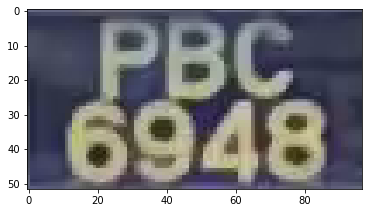

area = 273.5
area = 195.0
area = 92.0
area = 566.0
area = 469.0



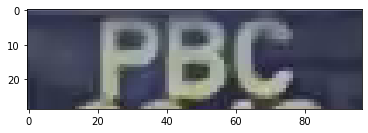

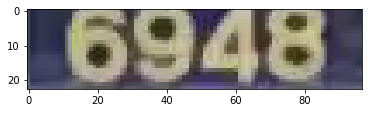

In [13]:
def pre_process(image, kernal_blur = 5, erosion = 2):
    org = image.copy()
    # Blur is probably not necessary in most cases
    im1 = cv2.GaussianBlur(image, (kernal_blur, kernal_blur), 0)

    im1 = dynamic_threshold(im1, erosion) # Recommend 2
    #print("After Erosion")
    #plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
    #plt.show()
    contours, hierarchy = cv2.findContours(im1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours = sorted(contours, key = x_cord_contour, reverse = False)

    #cv2.drawContours(org, contours, -1, (0,255,0), 1)
    #print("Number of contours found = " + str(len(contours)))

    #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    #plt.show()

    all_area = [cv2.contourArea(c) for c in contours if(cv2.contourArea(c) > 20)]
    return contours, all_area, org, im1

#image = cv2.imread('./FINAL_PLATES/HCZ5792_4b719878e237e342cb8656ca90c4b773.jpg')
#image = cv2.imread('./FINAL_PLATES/HBL3845_11fd5c969778278593b33708cf429617.png')
#image = cv2.imread('./FINAL_PLATES/HBX4175_6aa21c9dd8ea446230cce7a830be72fa.png')
#image = cv2.imread('./FINAL_PLATES/HBX7946_101c3b4d7fbc03cb6410f45d4411a945.jpg')
image = cv2.imread('./FINAL_PLATES/PBC6948_c48e574684f82d172dec62013753d2ef.png')

vertical = isPlateVertical(image)
blackgrnd = isBackgroundBlack(image)
print('Plate is vertical: {}'.format(vertical))
print('Plate is on black background: {}'.format(blackgrnd))

width = image.shape[0]
height = image.shape[1]
im_area = width * height

org = image.copy()

imshow(image)



def splitPlate(image):
    contours, all_area, org, th = pre_process(image)
    margin = int((th.shape[0] / 2) * 0.1)

    centerAxis = int(th.shape[0] / 2)
    lowerMargin = centerAxis - margin
    upperMargin = centerAxis + margin

    line_sums = []

    for i in range(21,31):
        line_sums.append(np.sum(th[i]))

    bestCenterLineIdx = np.argmin(line_sums) - margin + centerAxis
    
    split_plate = []
    top = image[0:bestCenterLineIdx, 0:image.shape[1]]
    split_plate.append(top)
    bottom = image[bestCenterLineIdx:centerAxis+bestCenterLineIdx, 0:image.shape[1]]
    split_plate.append(bottom)
    return split_plate

split = splitPlate(image)
for s in split:
    imshow(s)

In [160]:
#cropped = image[start_row:end_row , start_col:end_col]
#x, y, w, h = 0, bestCenterLineIdx, th.shape[1], bestCenterLineIdx
split_plate = []*2
split_plate

[]

In [149]:
bestCenterLineIdx

26

In [141]:
th.shape

(52, 97)

In [135]:
def getContoursforNumbers(image, original):
    contours, hierarchy = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours = sorted(contours, key = x_cord_contour, reverse = False)

    cv2.drawContours(original, contours, -1, (0,255,0), 3)
    print("Number of contours found = " + str(len(contours)))
    return contours, original

def x_cord_contour(contour):
    # This function take a contour from findContours
    # it then outputs the x centroid coordinates
    area = cv2.contourArea(contour)
    print("area = " + str(area))
    if area > 10:
        M = cv2.moments(contour)
        if M['m00'] == 0.0:
            return 0
        else:
            x_center = int(M['m10']/M['m00'])
            return x_center
    else:
        return 0

In [145]:
image = cv2.imread('./FINAL_PLATES/HCJ6241_2f73c81e0300ded4d6db9f2b51b35939.jpg')

eroded = dynamic_threshold(image)

contours, hierarchy = cv2.findContours(eroded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

contours = sorted(contours, key = x_cord_contour, reverse = False)

print(len(contours))
all_area = [cv2.contourArea(c) for c in contours if(cv2.contourArea(c) > 20)]
print(all_area)

contours, original = getContoursforNumbers(eroded, orig)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.show()

TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

In [92]:
bounding_boxes = []
min_digit_area = 20
max_digit_area = 1000

for cnt in contours:
    area = cv2.contourArea(cnt)
    if (area > min_digit_area and area < max_digit_area):
        x,y,w,h = cv2.boundingRect(cnt)
        ratio = (w*1.0) / (h*1.0)
        print("Ratio = " + str(ratio))
        
        if ratio > 0.5:
            bounding_boxes.append([x,y,x+w,y+h])
bounding_boxes

Ratio = 0.7916666666666666
Ratio = 0.75
Ratio = 0.7916666666666666
Ratio = 0.8260869565217391
Ratio = 0.782608695652174
Ratio = 0.75
Ratio = 0.25


[[120, 8, 139, 32],
 [99, 8, 117, 32],
 [77, 8, 96, 32],
 [50, 8, 69, 31],
 [30, 8, 48, 31],
 [8, 8, 26, 32]]

In [81]:
min_digit_area = 20
max_digit_area = 1000

fig, ax = plt.subplots(nrows=len(contours), ncols=1)

for row in ax:
    for col in row:
        col.plot(x, y)

plt.show()

for cnt in contours:
    
    area = cv2.contourArea(cnt)

    if (area > min_digit_area and area < max_digit_area):

        x,y,w,h = cv2.boundingRect(cnt)

        ratio = (w*1.0) / (h*1.0)

        print("Ratio = " + str(ratio))




Ratio = 0.7916666666666666
Ratio = 0.75
Ratio = 0.7916666666666666
Ratio = 0.8260869565217391
Ratio = 0.782608695652174
Ratio = 0.75
Ratio = 0.25


In [73]:
    if(ratio > 1.2 and ratio < 1.8: #and area > ave_contour_area):

        #Crop first digit
        x2, y2, w2, h2 = x, y, (w/2) - 1, h
        #Crop second digit
        x1, y1, w1, h1 = ((x+ w/2)), y, (w/2), h

        cv2.rectangle(imc,(x1,y1),(x1+w1,y1+h1),(255,0,0),2)
        cv2.rectangle(imc,(x2,y2),(x2+w2,y2+h2),(255,120,0),2)
        original = roi[y2:y2+h2, x2:x2+w2]
        bounding_boxes.append([x2,y2,x2+w2,y2+h2])
        original_numbers.append(original)

        original = roi[y1:y1+h1, x1:x1+w1]
        original_numbers.append(original)
        bounding_boxes.append([x1,y1,x1+w1,y1+h1])

SyntaxError: invalid syntax (<ipython-input-73-2172f608e50e>, line 1)

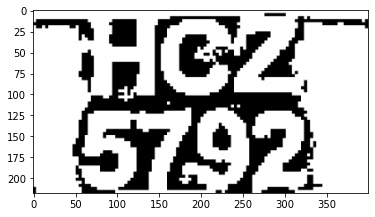

[[[-1 -1 -1 -1]]]
1


<ipython-input-74-3deb3a6d2808>:32: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
  labels = measure.label(thresh, neighbors=8, background=0)


error: OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/shapedescr.cpp:274: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function 'contourArea'


In [74]:
from skimage.filters import threshold_local
from skimage import segmentation
from skimage import measure
from imutils import perspective
import numpy as np
import imutils
import cv2

image = cv2.imread('./FINAL_PLATES/HCZ5792_4b719878e237e342cb8656ca90c4b773.jpg')
#isBackgroundBlack(image)

#image = cv2.GaussianBlur(image, (3, 3), 0)
#k = 3
#kernel = np.ones((k,k), np.uint8)
#image = cv2.erode(image, kernel, iterations = 1)
#imshow(image)

V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 29, offset=15, method="gaussian")
thresh = (V > T).astype("uint8") * 255
if isBackgroundBlack(image) == False:
    thresh = cv2.bitwise_not(thresh)

# resize the license plate region to a canonical size
plate = imutils.resize(image, width=400)
thresh = imutils.resize(thresh, width=400)

imshow(thresh)

# perform a connected components analysis and initialize the mask to store the locations
# of the character candidates
labels = measure.label(thresh, neighbors=8, background=0)
charCandidates = np.zeros(thresh.shape, dtype="uint8")

# loop over the unique components
for label in np.unique(labels):
    # if this is the background label, ignore it
    if label == 0:
        continue

    # otherwise, construct the label mask to display only connected components for the
    # current label, then find contours in the label mask
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    cnts = cv2.findContours(labelMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if imutils.is_cv2() else cnts[1]
    
    print(cnts)
    # ensure at least one contour was found in the mask
    print(len(cnts))
    if len(cnts) > 0:
        # grab the largest contour which corresponds to the component in the mask, then
        # grab the bounding box for the contour
        c = max(cnts, key=cv2.contourArea)
        (boxX, boxY, boxW, boxH) = cv2.boundingRect(c)

        # compute the aspect ratio, solidity, and height ratio for the component
        aspectRatio = boxW / float(boxH)
        solidity = cv2.contourArea(c) / float(boxW * boxH)
        heightRatio = boxH / float(plate.shape[0])

        # determine if the aspect ratio, solidity, and height of the contour pass
        # the rules tests
        keepAspectRatio = aspectRatio < 1.0
        keepSolidity = solidity > 0.15
        keepHeight = heightRatio > 0.4 and heightRatio < 0.95

        # check to see if the component passes all the tests
        if keepAspectRatio and keepSolidity and keepHeight:
            # compute the convex hull of the contour and draw it on the character
            # candidates mask
            hull = cv2.convexHull(c)
            cv2.drawContours(charCandidates, [hull], -1, 255, -1)